# Word Window Classification

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Inline plotting
%matplotlib inline

- What is word window classification?
- Why is it useful?
- How can we update fine-tune word vectors for classification?
- 

## Standard Classification Task

Suppose we have a training set $\mathbf{T} = \{ (\mathbf{x}_1, y_1), (\mathbf{x}_2, y_2), \cdots, (\mathbf{x}_N, y_N)  \}$ where $\mathbf{x} \in \mathbb{R}^{d}$. 

Let us assume we have $K$ classes i.e., $y_i \in { c_1, c_2, \cdots, c_K }$.

Given an unseen sample $x_{*}$, our goal is to predict its label $y_{*}$:
$$
p(y_{*} \mid x_{*}) = \frac{\exp(\mathbf{w}_y \mathbf{x}_{*})}{\sum_{k=1}^{K} \exp(\mathbf{w}_k \mathbf{x}_{*})}
$$

where $\mathbf{W} \in \mathbb{R}^{K \times d}$ is the parameters of the classifiers and $\mathbf{w}_y$ corresponds to the $y$th row of the matrix $\mathbf{W}$.

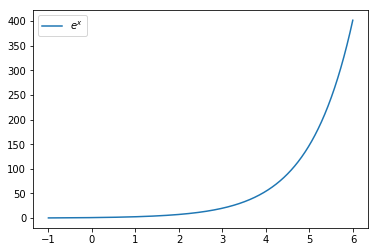

In [28]:
x = np.arange(-1, 6, 0.005)
fig, ax = plt.subplots()

ax.plot(x, np.exp(x), label='$e^{x}$')
ax.legend()

## Objective Function for Training

For each training sample $(\mathbf{x}_i, y_i)$, our objective is to maximise the probability of the correct class $y$ i.e., $p(y_i \mid \mathbf{x}_i)$

To maximise $p(y_i \mid \mathbf{x}_i)$, we can minimise the negative log probability of that class:

$$
- \log  p(y \mid \mathbf{x}) = - \log \left[ \frac{\exp(\mathbf{w}_y \mathbf{x})}{\sum_{k=1}^{K} \exp(\mathbf{w}_k \mathbf{x})} \right]
$$

Notice that $p(y \mid \mathbf{x})$ is a value between zero and one.

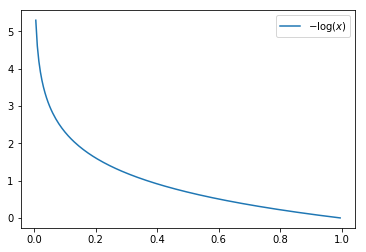

In [33]:
x = np.arange(0.005, 1, 0.005)
fig, ax = plt.subplots()

ax.plot(x, -np.log(x), label='$-\log(x)$')
ax.legend()

### Cross entropy objective function

The cross entropy objective function over all the training samples is:

$$
\mathcal{J}(\theta) = \frac{1}{N} \sum_{i=1}^{N} - \log \left[ \frac{\exp(\mathbf{w}_y \mathbf{x})}{\sum_{k=1}^{K} \exp(\mathbf{w}_k \mathbf{x})} \right] + \lambda \sum_{t} \theta_t^2
$$

The last term is the regularisation term, which pushes the parameters $\theta$ to be very small. This avoids overfitting.

In general, $\theta$ usually consists of columns of $\mathbf{W}$:
$$
\theta = \begin{bmatrix}\mathbf{W}_1 \\\mathbf{W}_2 \\ \vdots \\ \mathbf{W}_d
\end{bmatrix}
$$

To optimise our objective function $\mathcal{J}$, we take the derivative of $\mathcal{J}$ with respect to $\theta$ to update the weights.

In general, $\theta$ usually consists of columns of $\mathbf{W}$:
$$
\nabla_\theta \mathcal{J}(\theta) = \begin{bmatrix}
\nabla \mathbf{W}_1 \\
\nabla \mathbf{W}_2 \\
\vdots \\
\nabla \mathbf{W}_d
\end{bmatrix} \in \mathbb{R}^{Kd}
$$

## When to use end-to-end training?

In Deep Learning NLP, we want to learn both the classifier parameters $\mathbf{W}$ and the word vectors in an end-to-end fashion.

If we have a small training data set, we don't want to train word vectors because it may not generalise well. It is better to use word2vec or GloVe and keep them fixed. 

However, if the training set is large, it may work better to train word vectors to the task i.e., train the word vectors as part of the overall objective.

## Window Classification

Window classification is about classifying or assigning a label to a word in its context of neighbouring words.

<img src="figures/window-classifier-example.png" width="350" />

## Named Entity Recognition (NER)

In named-entity recognition, we want to classify the center word of a window into four classes:
- Person
- Location
- Organisation
- Misc (none of the above)

<img src="figures/named-entity-recognition-example.png" width="400" />







## Softmax Classifier

The simples word window classifier is a softmax/logistic regression classifier.

The **main issue** with the the softmax classifier is that it only gives a linear decision boundary in the original space. With little data this may be a good thing. However, with large amount of data this is limiting.

<img src="figures/softmax-linear-decision-boundary.png" width="300" />










Neural networks can fit much more complex functions to our training data and gives nonlinear decision boundaries. 

## Neural Network Classifier

<img src="figures/neuron.png" width="400" />














## Max-Margin Loss

The max-margin loss function is often more robust than cross entropy loss function.

Assume we want to classify whether the center word is a Location in the sentence:

*"Not all museums in Paris are amazing."*

From this sentence we can create following windows of size 2:
- <font color="red"><em>"Not all <b>museums</b> in Paris"</em></font>
- <font color="red"><em>"all museums <b>in</b> Paris are"</em></font>
- <font color="green"><em>"museums in <b>Paris</b> are amazing"</em></font>

In this case, there is only one true window which is the one with **Paris** in its center:

<font color="green"><em>"museums in <b>Paris</b> are amazing"</em></font>

All the other windows are said to be "corrupt" because they don't have a named entity location in their center.

We want to give a high score to windows where the center word is a location (positive class) and low scores to corrupt/incorrect windows where the center word is not a location (negative class).

<img src="figures/max-margin-loss-objective.png" width="400" />










The number 1 is called the margin. It can be a hyperparameter.

The max-margin attempts to increase the distance between the closest points to the decision boundary.

This is similar to what Support Vector Machine is doing.